# 9) 단순회귀분석(random)

In [1]:
import torch
import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
a=torch.linspace(-1, 1, 10)

print(a)
print(a.shape)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


In [3]:
# size가 1인 dimension 추가
# dim=추가할인덱스, (0, 추가할 인덱스)

b=torch.unsqueeze(torch.linspace(-1, 1, 10), dim=1)

print(b)
print(b.shape)

tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
torch.Size([10, 1])


In [4]:
# size가 1인 dimension 제거
# dim=추가할인덱스, (0, 추가할 인덱스)

print(b.shape)
print(torch.squeeze(b))
print(torch.squeeze(b).shape)

torch.Size([10, 1])
tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


torch.Size([100, 1])
torch.Size([100, 1])


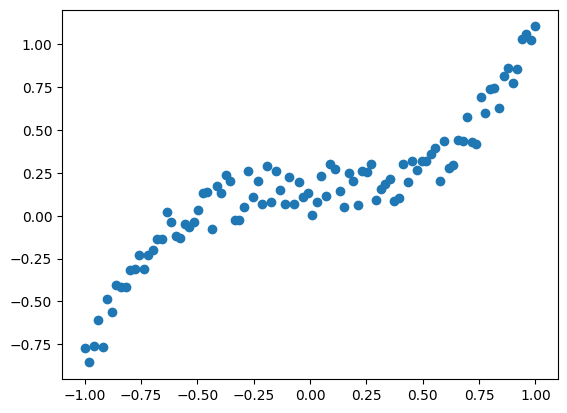

In [5]:
import random
from matplotlib import pyplot as plt

random.seed(1)
torch.manual_seed(1)

X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

print(X.shape)
print(y.shape)

plt.scatter(X.cpu().numpy(), y.cpu().numpy())

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from torch import nn

learning_rate = 1e-3

model = nn.Sequential(
    nn.Linear(1, 100),
    nn.Linear(100, 10),
    nn.Linear(10, 1)
)

model.to(device) # Convert to CUDA

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [8]:
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(1000):
    y_pred = model(X_train)   

    loss = criterion(y_pred, y_train)
    print(f"epoch: {t}, loss: {loss:.3f}")
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

epoch: 0, loss: 0.176
epoch: 1, loss: 0.172
epoch: 2, loss: 0.168
epoch: 3, loss: 0.163
epoch: 4, loss: 0.159
epoch: 5, loss: 0.156
epoch: 6, loss: 0.152
epoch: 7, loss: 0.148
epoch: 8, loss: 0.145
epoch: 9, loss: 0.141
epoch: 10, loss: 0.138
epoch: 11, loss: 0.135
epoch: 12, loss: 0.132
epoch: 13, loss: 0.129
epoch: 14, loss: 0.126
epoch: 15, loss: 0.124
epoch: 16, loss: 0.121
epoch: 17, loss: 0.118
epoch: 18, loss: 0.116
epoch: 19, loss: 0.114
epoch: 20, loss: 0.111
epoch: 21, loss: 0.109
epoch: 22, loss: 0.107
epoch: 23, loss: 0.105
epoch: 24, loss: 0.103
epoch: 25, loss: 0.101
epoch: 26, loss: 0.099
epoch: 27, loss: 0.097
epoch: 28, loss: 0.095
epoch: 29, loss: 0.094
epoch: 30, loss: 0.092
epoch: 31, loss: 0.091
epoch: 32, loss: 0.089
epoch: 33, loss: 0.087
epoch: 34, loss: 0.086
epoch: 35, loss: 0.085
epoch: 36, loss: 0.083
epoch: 37, loss: 0.082
epoch: 38, loss: 0.081
epoch: 39, loss: 0.079
epoch: 40, loss: 0.078
epoch: 41, loss: 0.077
epoch: 42, loss: 0.076
epoch: 43, loss: 0.07

In [9]:
learning_rate = 1e-3
n_networks = 9

models = list()
criterion = torch.nn.MSELoss()

for i in range(n_networks):
    model = nn.Sequential(
        nn.Linear(1, 100),
        nn.ReLU() if i % 3 == 0 else nn.Tanh() if i % 3==1 else nn.Sigmoid(),
        nn.Linear(100, 1)
    )

    model.to(device)    

    models.append(model)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(1000):
        y_pred = model(X_train)

        loss = criterion(y_pred, y_train)
        print(f"model: {i + 1}, epoch: {t}, loss: {loss.item():.3f}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model: 1, epoch: 0, loss: 0.189
model: 1, epoch: 1, loss: 0.172
model: 1, epoch: 2, loss: 0.155
model: 1, epoch: 3, loss: 0.140
model: 1, epoch: 4, loss: 0.126
model: 1, epoch: 5, loss: 0.113
model: 1, epoch: 6, loss: 0.101
model: 1, epoch: 7, loss: 0.090
model: 1, epoch: 8, loss: 0.081
model: 1, epoch: 9, loss: 0.072
model: 1, epoch: 10, loss: 0.065
model: 1, epoch: 11, loss: 0.059
model: 1, epoch: 12, loss: 0.053
model: 1, epoch: 13, loss: 0.048
model: 1, epoch: 14, loss: 0.044
model: 1, epoch: 15, loss: 0.041
model: 1, epoch: 16, loss: 0.038
model: 1, epoch: 17, loss: 0.036
model: 1, epoch: 18, loss: 0.035
model: 1, epoch: 19, loss: 0.033
model: 1, epoch: 20, loss: 0.032
model: 1, epoch: 21, loss: 0.031
model: 1, epoch: 22, loss: 0.030
model: 1, epoch: 23, loss: 0.030
model: 1, epoch: 24, loss: 0.030
model: 1, epoch: 25, loss: 0.029
model: 1, epoch: 26, loss: 0.029
model: 1, epoch: 27, loss: 0.029
model: 1, epoch: 28, loss: 0.029
model: 1, epoch: 29, loss: 0.029
model: 1, epoch: 30,

In [10]:
from torch.autograd import Variable

acc=[]

for model in models:
    X_test, y_test = Variable(X_test), Variable(y_test)
    mse = ((torch.pow((model(X_test).data.cpu() - y_test.cpu()), 2)).sum()) / len(y_test.cpu())
    acc.append(mse)
    print(mse)

tensor(0.0082)
tensor(0.0134)
tensor(0.0305)
tensor(0.0082)
tensor(0.0094)
tensor(0.0315)
tensor(0.0081)
tensor(0.0104)
tensor(0.0307)


In [11]:
import numpy as np

model=models[np.argmin(acc)]

print(model)
print(np.argmin(acc))
print(acc[np.argmin(acc)])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
6
tensor(0.0081)


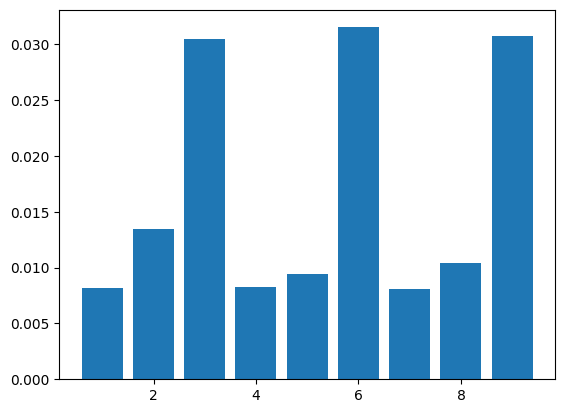

In [13]:
plt.bar(range(1,10),acc)

plt.show()

In [12]:
from torchinfo import summary

summary(model)
summary(model, input_size=(32, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 100]                 200
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 1]                   101
Total params: 301
Trainable params: 301
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.03

In [17]:
# pip install torchviz

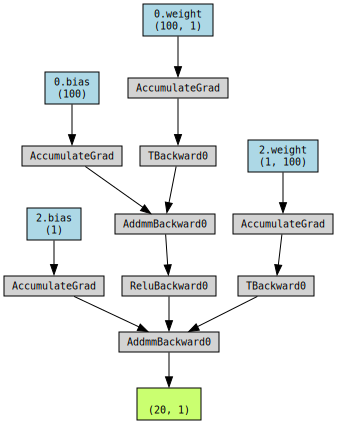

In [18]:
from torchviz import make_dot

pred=model(X_test)

make_dot(pred, params=dict(model.named_parameters()))


(dot.exe:15888): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


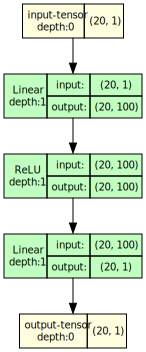

In [21]:
from torchview import draw_graph

model_graph = draw_graph(model, input_data=X_test)

model_graph.visual_graph

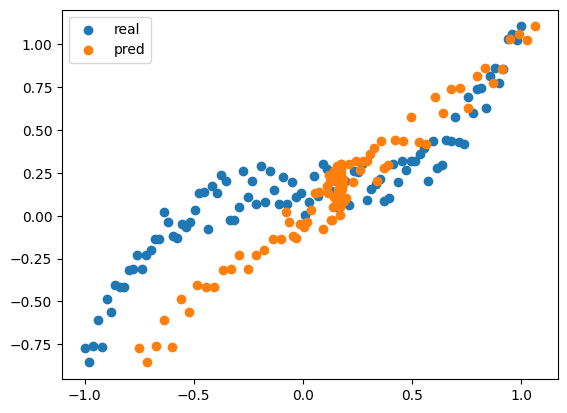

In [22]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='real')
plt.scatter(model(X).cpu().detach().numpy(), y.cpu().numpy(), label='pred')

plt.legend()
plt.show()